### Week 13: Interpretable AI
```
- Advanced Machine Learning, Innopolis University 
- Professor: Muhammad Fahim 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

```
Lab Plan
    1. Interpret Microsoft
        - Glassbox Models
        - Explainable Boosting Machine (EBM)
    2. LIME
        - Text Data
        - Image Data
    3. SHAP
        - Background
        - Force plots
        - Dependence plots
 
```

<hr>

# 1. Interpret Microsoft

Interpret ML is an open-source package from (more contributions from microsoft) that incorporates state-of-the-art machine learning interpretability techniques. To install `pip install interpret` 

## Glassbox Models & Explainable Boosting Machine

These are learning algorithms that are designed to be interpretable i.e decision trees. With these models its possible to trace and reason about how any decision or prediction was made. 
<br>
What are the disadvantages of such models?


On top of commonly known interpretable classifiers Microsoft Research developed Explainable Boosting Machine (EBM). EBM uses modern machine learning techniques like bagging, gradient boosting, and automatic interaction detection along with Generalized Additive Models (GAMs)

### Example (Classification)

In [6]:
!pip install interpret

     |████████████████████████████████| 5.8MB 5.2MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 1.8MB 30.8MB/s 
     |████████████████████████████████| 5.6MB 30.3MB/s 
     |████████████████████████████████| 3.6MB 35.0MB/s 
     |████████████████████████████████| 296kB 32.3MB/s 
     |████████████████████████████████| 276kB 36.5MB/s 
     |████████████████████████████████| 788kB 30.0MB/s 
     |████████████████████████████████| 122kB 39.5MB/s 
     |████████████████████████████████| 860kB 17.5MB/s 
     |████████████████████████████████| 358kB 32.7MB/s 
     |████████████████████████████████| 1.0MB 24.2MB/s 
     |████████████████████████████████| 3.5MB 27.4MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 256kB 38.6MB/s 
     |████████████████████████████████| 368kB 35.1MB/s 
     |████████████████████████████████| 358kB 38.5MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-n

In [2]:
import pandas as pd
import numpy as np


data_path = "SeoulBikeData.csv"

df = pd.read_csv(data_path, engine='python')
df = df.select_dtypes(include=[np.number]) #select columns with numerical data
df["target"] = df["Rented Bike Count"].apply(lambda x : 1 if  x > 500 else 0)
df.drop(["Rented Bike Count"],axis=1,inplace=True)

df.head()

Hour  Temperature(�C)  Humidity(%)  ...  Rainfall(mm)  Snowfall (cm)  target
0     0             -5.2           37  ...           0.0            0.0       0
1     1             -5.5           38  ...           0.0            0.0       0
2     2             -6.0           39  ...           0.0            0.0       0
3     3             -6.2           40  ...           0.0            0.0       0
4     4             -6.0           36  ...           0.0            0.0       0

[5 rows x 10 columns]

In [3]:
df.dtypes

Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
target                         int64
dtype: object

## 1.1 Split data to train and test

In [4]:
X_train, y_train = df.drop(["target"],axis=1)[:7008], df["target"][:7008]
X_test, y_test = df.drop(["target"],axis=1)[7008:], df["target"][7008:]

In [7]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


## 1.2 Create and fit Explainable Boosting Classifier

In [8]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier
seed = 1
ebm = ExplainableBoostingClassifier(random_state=5291)
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

ExplainableBoostingClassifier(binning='quantile', early_stopping_rounds=50,
                              early_stopping_tolerance=0.0001,
                              feature_names=['Hour', 'Temperature(�C)',
                                             'Humidity(%)', 'Wind speed (m/s)',
                                             'Visibility (10m)',
                                             'Dew point temperature(�C)',
                                             'Solar Radiation (MJ/m2)',
                                             'Rainfall(mm)', 'Snowfall (cm)',
                                             'Hour x Temperature(�C)',
                                             'Hour x Dew point temperature(�C)',
                                             'Hour x Humidity(%)',
                                             'H...
                                             'continuous', 'interaction',
                                             'interaction', 'interaction',
 

In [9]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

## 1.3 Explain the prediction for specific sample

In [10]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [11]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

## 1.4 Fit Logistic Regression and Classification Tree

In [12]:
from interpret.glassbox import LogisticRegression, ClassificationTree

lr = LogisticRegression(random_state=seed, feature_names=list(X_train.columns), penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

tree = ClassificationTree()
tree.fit(X_train, y_train)

In [13]:
lr_perf = ROC(lr.predict_proba).explain_perf(X_test, y_test, name='Logistic Regression')
tree_perf = ROC(tree.predict_proba).explain_perf(X_test, y_test, name='Classification Tree')

show(lr_perf)
show(tree_perf)
show(ebm_perf)

In [14]:
lr_global = lr.explain_global(name='LR')
tree_global = tree.explain_global(name='Tree')

show(lr_global)
show(tree_global)
show(ebm_global)

## 1.5 Create a Dashboard for comparing models

In [15]:

# Do everything in one shot with the InterpretML Dashboard by passing a list into show

show([hist, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

## 1.5 Interpretable Regression Methods

In [16]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
feature_names = list(boston.feature_names)
df = pd.DataFrame(boston.data, columns=feature_names)
df["target"] = boston.target

train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [17]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

In [18]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0.0001,
                             feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                            'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT',
                                            'DIS x LSTAT', 'CRIM x LSTAT',
                                            'AGE x LSTAT', 'DIS x B',
                                            'NOX x LSTAT', 'INDUS x LSTAT',
                                            'TAX x LSTAT', 'B x LSTAT',
                                            'RM x LSTAT', 'RAD x LSTAT'],
                             feature_types=['continuous', '...
                                            'continuous', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction'

In [19]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [20]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [21]:
from interpret import show
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

In [22]:
from interpret.glassbox import LinearRegression, RegressionTree

lr = LinearRegression(random_state=seed)
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=seed)
rt.fit(X_train, y_train)

In [23]:
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')

show(lr_perf)
show(rt_perf)
show(ebm_perf)

In [24]:
lr_global = lr.explain_global(name='Linear Regression')
rt_global = rt.explain_global(name='Regression Tree')

show(lr_global)
show(rt_global)
show(ebm_global)

In [25]:
show([marginal, lr_global, lr_perf, rt_global, rt_perf, ebm_global, ebm_perf])

## Explaining Blackbox Regressors

In [26]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
feature_names = list(boston.feature_names)
df = pd.DataFrame(boston.data, columns=feature_names)
df["target"] = boston.target
# df = df.sample(frac=0.1, random_state=1)
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Blackbox system can include preprocessing, not just a regressor!
pca = PCA()
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, 

In [28]:
from interpret import show
from interpret.perf import RegressionPerf

blackbox_perf = RegressionPerf(blackbox_model.predict).explain_perf(X_test, y_test, name='Blackbox')
show(blackbox_perf)

In [29]:
from interpret.blackbox import LimeTabular
from interpret import show

#Blackbox explainers need a predict function, and optionally a dataset
lime = LimeTabular(predict_fn=blackbox_model.predict, data=X_train, random_state=1)

#Pick the instances to explain, optionally pass in labels if you have them
lime_local = lime.explain_local(X_test[5:10], y_test[5:10], name='LIME')

show(lime_local)

In [30]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [31]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=blackbox_model.predict, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

In [32]:
show([blackbox_perf, lime_local, sensitivity_global, pdp_global])

# 2. LIME

In [33]:
!pip install lime

## 2.1 Text data

Dataset comprises around 18000 newsgroups posts on 20 topics. Data available from `sklearn.datasets`. For this example we will use only two topics : `alt.atheism` & `soc.religion.christian`

In [34]:
import lime
import sklearn
import numpy as np
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from sklearn.pipeline import make_pipeline

## 2.2 Read Dataset and Split (train & test)

In [35]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

## 2.3 Extract features with TF-IDF

In [36]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

## 2.4 Train a simple ML classifier 

In [37]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.9241540256709451

## 2.5 Create text classification pipeline

In [39]:
text_classification_pipeline = make_pipeline(vectorizer, rf)
print(text_classification_pipeline.predict_proba([newsgroups_test.data[0]]))

[[0.306 0.694]]


## 2.6 Create a text explainer 

In [40]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [41]:
idx = 10
exp = explainer.explain_instance(newsgroups_test.data[idx], text_classification_pipeline.predict_proba, num_features=6)
print(f'Document id: {idx}')
print('Probability(christian) =', text_classification_pipeline.predict_proba([newsgroups_test.data[idx]])[0,1])
print(f'True class: {class_names[newsgroups_test.target[idx]]}')

Document id: 10
Probability(christian) = 0.896
True class: christian


In [42]:
exp.as_list()

[('rutgers', 0.028479590800477617),
 ('athos', 0.02524092952897481),
 ('article', -0.025222264985258477),
 ('1993', 0.02487306289961231),
 ('Christ', 0.019442180292311973),
 ('God', 0.01660755018894498)]

In [43]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.896
Prediction removing some features: 0.896


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



Difference: 0.0


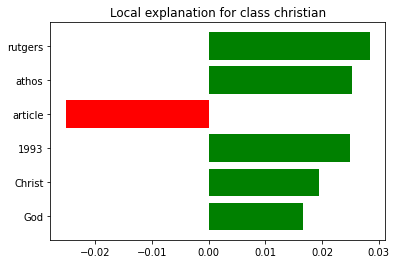

In [44]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [45]:
exp.show_in_notebook(text=False)

In [46]:
exp.show_in_notebook(text=True)

## 3. Image Data

We will use already pretrained model from PyTorch. 

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json
from skimage.segmentation import mark_boundaries

import torch
from torchvision import models, transforms
import torch.nn.functional as F

## 3.1 Load Image 

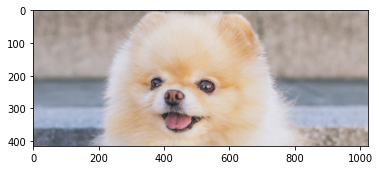

In [50]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
        
img = get_image('010-pomeranian_1024.jpg')
plt.imshow(img)

## 3.2 Transform Image

In [51]:
def get_input_transform():     
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]) 
    ])    

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)

## 3.3 Import Pretrained Resnet 

In [52]:
model = models.resnet18(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

## 3.4 Get Class index (imagenet)

In [53]:
idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}

## 3.5 Perform Classification

In [54]:
img_t = get_input_tensors(img)
model.eval()
logits = model(img_t)

In [55]:
probs = F.softmax(logits, dim=1)
probs5 = probs.topk(5)
tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))

((0.93341064, 259, 'Pomeranian'),
 (0.044722047, 283, 'Persian_cat'),
 (0.008117272, 154, 'Pekinese'),
 (0.006613559, 260, 'chow'),
 (0.0012697283, 258, 'Samoyed'))

In [56]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():   
    transf = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) 
        ])    

    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [57]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [58]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

259

## 3.6 Create an Image explainer

In [59]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function

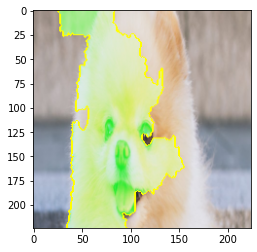

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

# 3. Shapely 

Game theory approach to explain the output of any machine learning model. 

[LIME vs Shap](https://towardsdatascience.com/idea-behind-lime-and-shap-b603d35d34eb)

To install `pip install shap`

In [60]:
!pip install shap

## 3.1 Load Data 

In [61]:
import shap
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# load dataset
boston_data = load_boston()
X = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
y = boston_data['target']

# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 3.2 Define model and train model

In [62]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## 3.3 Explain the model's predictions using SHAP

Same syntax works for LightGBM, CatBoost, scikit-learn and spark models

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [64]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

In [65]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

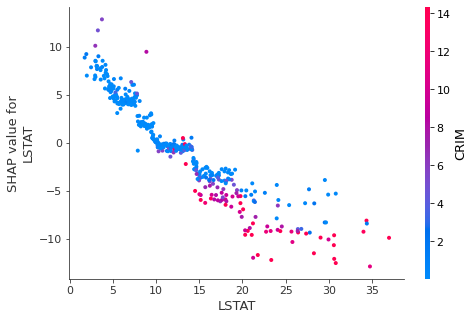

In [66]:
shap.dependence_plot("LSTAT", shap_values, X_train)

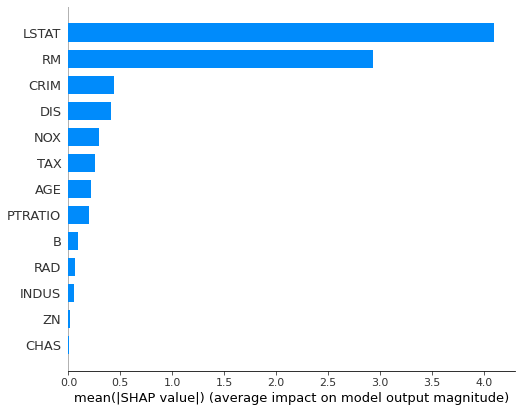

In [67]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

## 3.4 SHAP for text data

In [69]:
!pip install transformers

     |████████████████████████████████| 2.3MB 5.0MB/s 
     |████████████████████████████████| 3.3MB 25.6MB/s 
     |████████████████████████████████| 901kB 34.1MB/s 


In [70]:
import transformers
import shap

test_sample = ["I did not like todays movie! ...it reminds me of my childhood experiences. however some scenes i liked"]

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(test_sample)

# visualize the first prediction's explanation for the  NEGATIVE output class
shap.plots.text(shap_values[0, :, "NEGATIVE"])

In [71]:
model(test_sample)

[[{'label': 'NEGATIVE', 'score': 0.073392853140831},
  {'label': 'POSITIVE', 'score': 0.926607072353363}]]

## References

1. https://github.com/marcotcr/lime
2. https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/
3. https://github.com/marcotcr/lime-experiments
4. https://github.com/interpretml/interpret
5. https://colab.research.google.com/github/pair-code/what-if-tool/blob/master/WIT_Age_Regression.ipynb
6. https://pair-code.github.io/what-if-tool/index.html#demos
7. https://arxiv.org/pdf/1909.09223.pdf
8. https://www.microsoft.com/en-us/research/wp-content/uploads/2017/06/KDD2015FinalDraftIntelligibleModels4HealthCare_igt143e-caruanaA.pdf
9. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. https://github.com/interpretml/interpret/blob/master/examples/python/notebooks/Explaining%20Blackbox%20Regressors.ipynb
1. https://github.com/interpretml/interpret/blob/master/examples/python/notebooks/Explaining%20Blackbox%20Classifiers.ipynb
1. https://github.com/interpretml/interpret/blob/master/examples/python/notebooks/Interpretable%20Classification%20Methods.ipynb
1. https://christophm.github.io/interpretable-ml-book/lime.html
1. https://arxiv.org/pdf/1610.02391.pdf
1. https://www.youtube.com/watch?v=Y8mSngdQb9Q